In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install river~=0.21.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.6 MB/s eta 0:00:00


In [ ]:
import river
from river import metrics
from river import time_series
from google.colab import files
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
# uploaded = files.upload()  #Upload the CSV file to Colab

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Sistemas Informáticos en IoT/TFA_Caja_Fuerte/sensor_data.csv' #Está trabajando sobre el fichero que has subido en el parte antes
caja_fuerte_data = pd.read_csv(file_path)

In [ ]:
#Convertir la columna 'time' al formato datetime y establecerla como el índice
caja_fuerte_data['timestamp'] = pd.to_datetime(caja_fuerte_data['timestamp'])
caja_fuerte_data.set_index('timestamp', inplace=True)

#Remuestrear los datos de temperatura a promedio diario
temperature_df = caja_fuerte_data['temperature'].resample('T').mean()
humidity_df = caja_fuerte_data['humidity'].resample('T').mean()

#Eliminar filas con valores NaN
temperature_df.dropna(inplace=True)
humidity_df.dropna(inplace=True)

#Convertir los datos de temperatura promedio diaria en una lista de tuplas (fecha, valor)
dataset = list(enumerate(temperature_df.values))
print(len(dataset))

73


<ipython-input-33-2cd011b47339>:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  temperature_df = caja_fuerte_data['temperature'].resample('T').mean()
<ipython-input-33-2cd011b47339>:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  humidity_df = caja_fuerte_data['humidity'].resample('T').mean()


In [ ]:
model = time_series.HoltWinters(
    alpha=0.9+0.05,  #Incremento del suavizado del nivel para dar más peso a los datos recientes
    beta=0.02+0.03,   #Incremento del suavizado de la tendencia para una mejor detección de la tendencia
    gamma=0.05,  #Reducción del suavizado de la estacionalidad para evitar sobreajuste
    seasonality=10,  #Número de períodos en una temporada (datos diarios, estacionalidad anual)
    multiplicative=False  #Usar un modelo aditivo para la estacionalidad para ajustar mejor los datos de temperatura
)

In [ ]:
period = 10
model = time_series.SNARIMAX(
    p=period,
    d=1,
    q=period,
    m=period,
    sd=1
)

In [ ]:
metric = metrics.MAE()

observed = []
predicted = []

contador = 0
periodo_aprendizaje = 10  #Aumentar el período de aprendizaje antes de hacer predicciones

In [ ]:
for _, y in dataset:
    model.learn_one(y)
    contador += 1

    if contador > periodo_aprendizaje:
        pred = model.forecast(1)
        observed.append(y)
        predicted.append(pred)

#Predecir los próximos 10 puntos de datos después de entrenar con todo el conjunto de datos
predictions_3 = model.forecast(3)
print("Próximas 3 predicciones:", predictions_3)

Próximas 3 predicciones: [22.460429163756285, 22.370345492769932, 22.55822224254402]


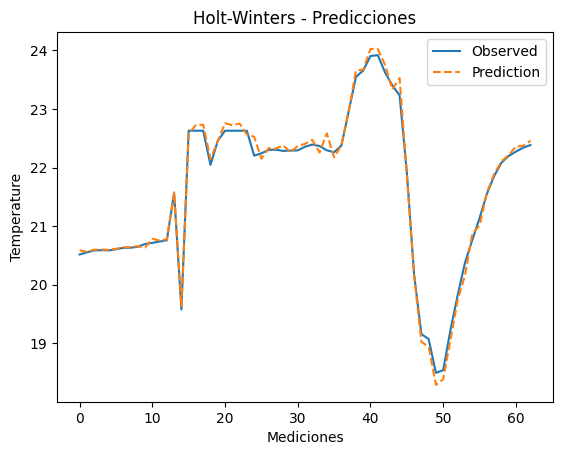

In [ ]:
plt.plot(observed, label='Observed')
plt.plot(predicted, label='Prediction', linestyle='--')
plt.legend()
plt.xlabel('Mediciones')
plt.ylabel('Temperature')
plt.title('Holt-Winters - Predicciones')
plt.show()